In [24]:
import tensorflow_datasets as tfds
import tensorflow as tf
from PIL import Image, ImageDraw

In [ ]:
import sys
sys.path.append('../')

In [3]:
from tfds_data import Dataset, create_batch_generator
from anchor import generate_default_boxes

In [4]:
config = {
    'ratios': [[2], [2, 3], [2, 3], [2, 3], [2], [2]],
    'scales': [0.1, 0.2, 0.375, 0.55, 0.725, 0.9, 1.075],
    'fm_sizes': [38, 19, 10, 5, 3, 1],
    'image_size': 300
}

scales = config['scales']
fm_sizes = config['fm_sizes']
ratios = config['ratios']

In [5]:
default_boxes = generate_default_boxes(config)

In [78]:
dataset = Dataset('/data/tensorflow_datasets', default_boxes, 300)

In [7]:
# dataset.data

In [8]:
@tf.function
def map_compute_target(filename, image, bbox, labels):
    tout = [tf.int64, tf.float32]
    gt_confs, gt_locs = tf.py_function(compute_target, [default_boxes, bbox, labels], tout)
        
    return filename, image, gt_confs, gt_locs
    


In [9]:
# dataset.data.map(map_compute_target)

In [10]:
# for e in dataset.data.take(1):
#     print(e[2])
#     filename, image, bbox, labels = e
#     gt_confs, gt_locs = compute_target(default_boxes, bbox, labels)

In [11]:
# gt_confs, gt_locs

In [12]:
# for e in dataset.data.map(fn).take(1): print(e)

In [18]:
data_gen, val_gen, info = create_batch_generator(default_boxes, 300, None, None)

In [103]:
for e in dataset.data.take(1):
    _, image, gt_box, labels = e

In [104]:
pil_image = Image.fromarray(image.numpy().astype('uint8'))
patch = ImageDraw.Draw(pil_image)

In [105]:
h, w = image.numpy().shape[:2]
xmin, ymin, xmax, ymax = gt_box.numpy()[0] * (h,w,h,w)

In [106]:
patch.rectangle(((xmin, ymin), (xmax, ymax)), outline='#00FFFF')

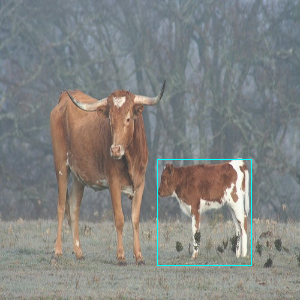

In [107]:
pil_image

In [1]:
from tqdm.auto import trange, tqdm

In [2]:
tqdm(enumerate((1,2,3)))

|<bar/>| 0/? [00:00<?, ?it/s]